In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.1/107.7 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
# !mkdir {HOME}/drive/MyDrive/YoloV8/datasets
%cd {HOME}/drive/MyDrive/YoloV8/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Your API Key")
project = rf.workspace("asu-uwfdw").project("liver-disease-n4mfd")
dataset = project.version(1).download("yolov8")

## Custom Training

In [ ]:
dataset.location

'/content/drive/MyDrive/YoloV8/datasets/Liver-Disease-1'

In [ ]:
%cd {HOME}/drive/MyDrive/YoloV8

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content/drive/MyDrive/YoloV8
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/drive/MyDrive/YoloV8/datasets/Liver-Disease-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=

In [ ]:
!ls {HOME}/drive/MyDrive/YoloV8/runs/detect/train5

args.yaml					    results.png		   val_batch0_pred.jpg
confusion_matrix.png				    train_batch0.jpg	   val_batch1_labels.jpg
events.out.tfevents.1698389363.174f36f1a548.6239.0  train_batch1.jpg	   val_batch1_pred.jpg
F1_curve.png					    train_batch2610.jpg    val_batch2_labels.jpg
P_curve.png					    train_batch2611.jpg    val_batch2_pred.jpg
PR_curve.png					    train_batch2612.jpg    weights
R_curve.png					    train_batch2.jpg
results.csv					    val_batch0_labels.jpg


/content


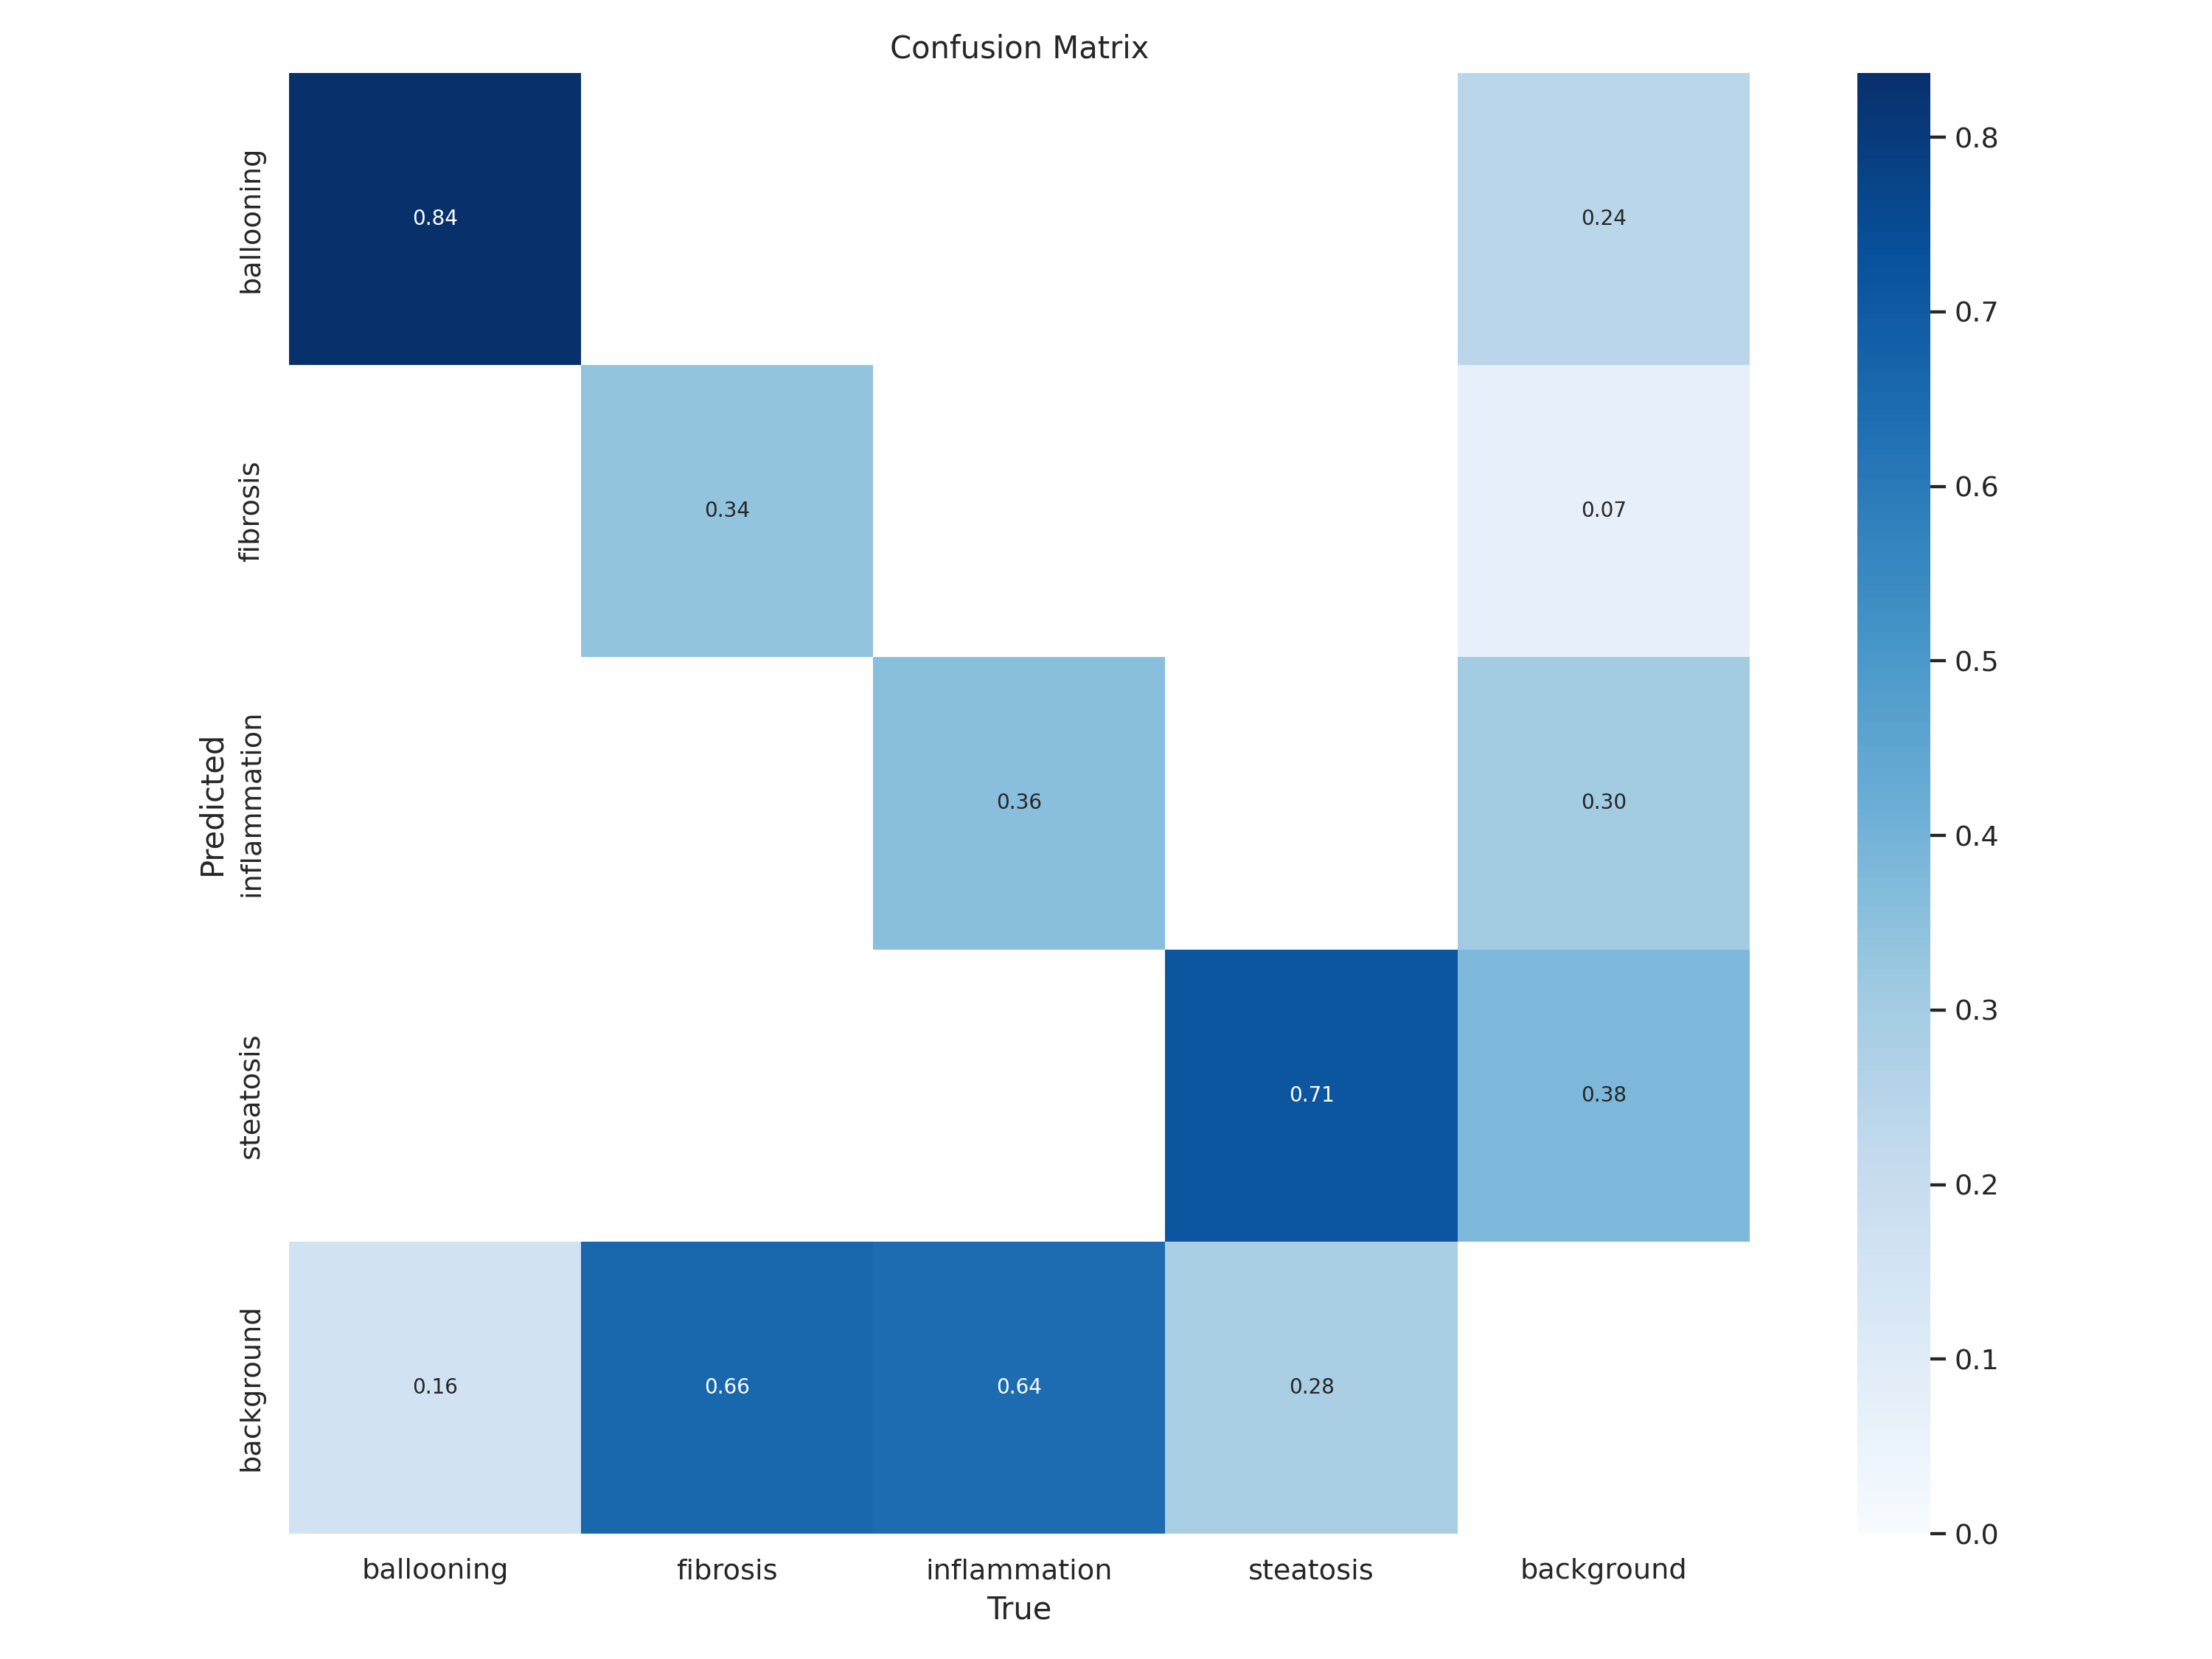

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/drive/MyDrive/YoloV8/runs/detect/train5/confusion_matrix.png', width=600)

/content


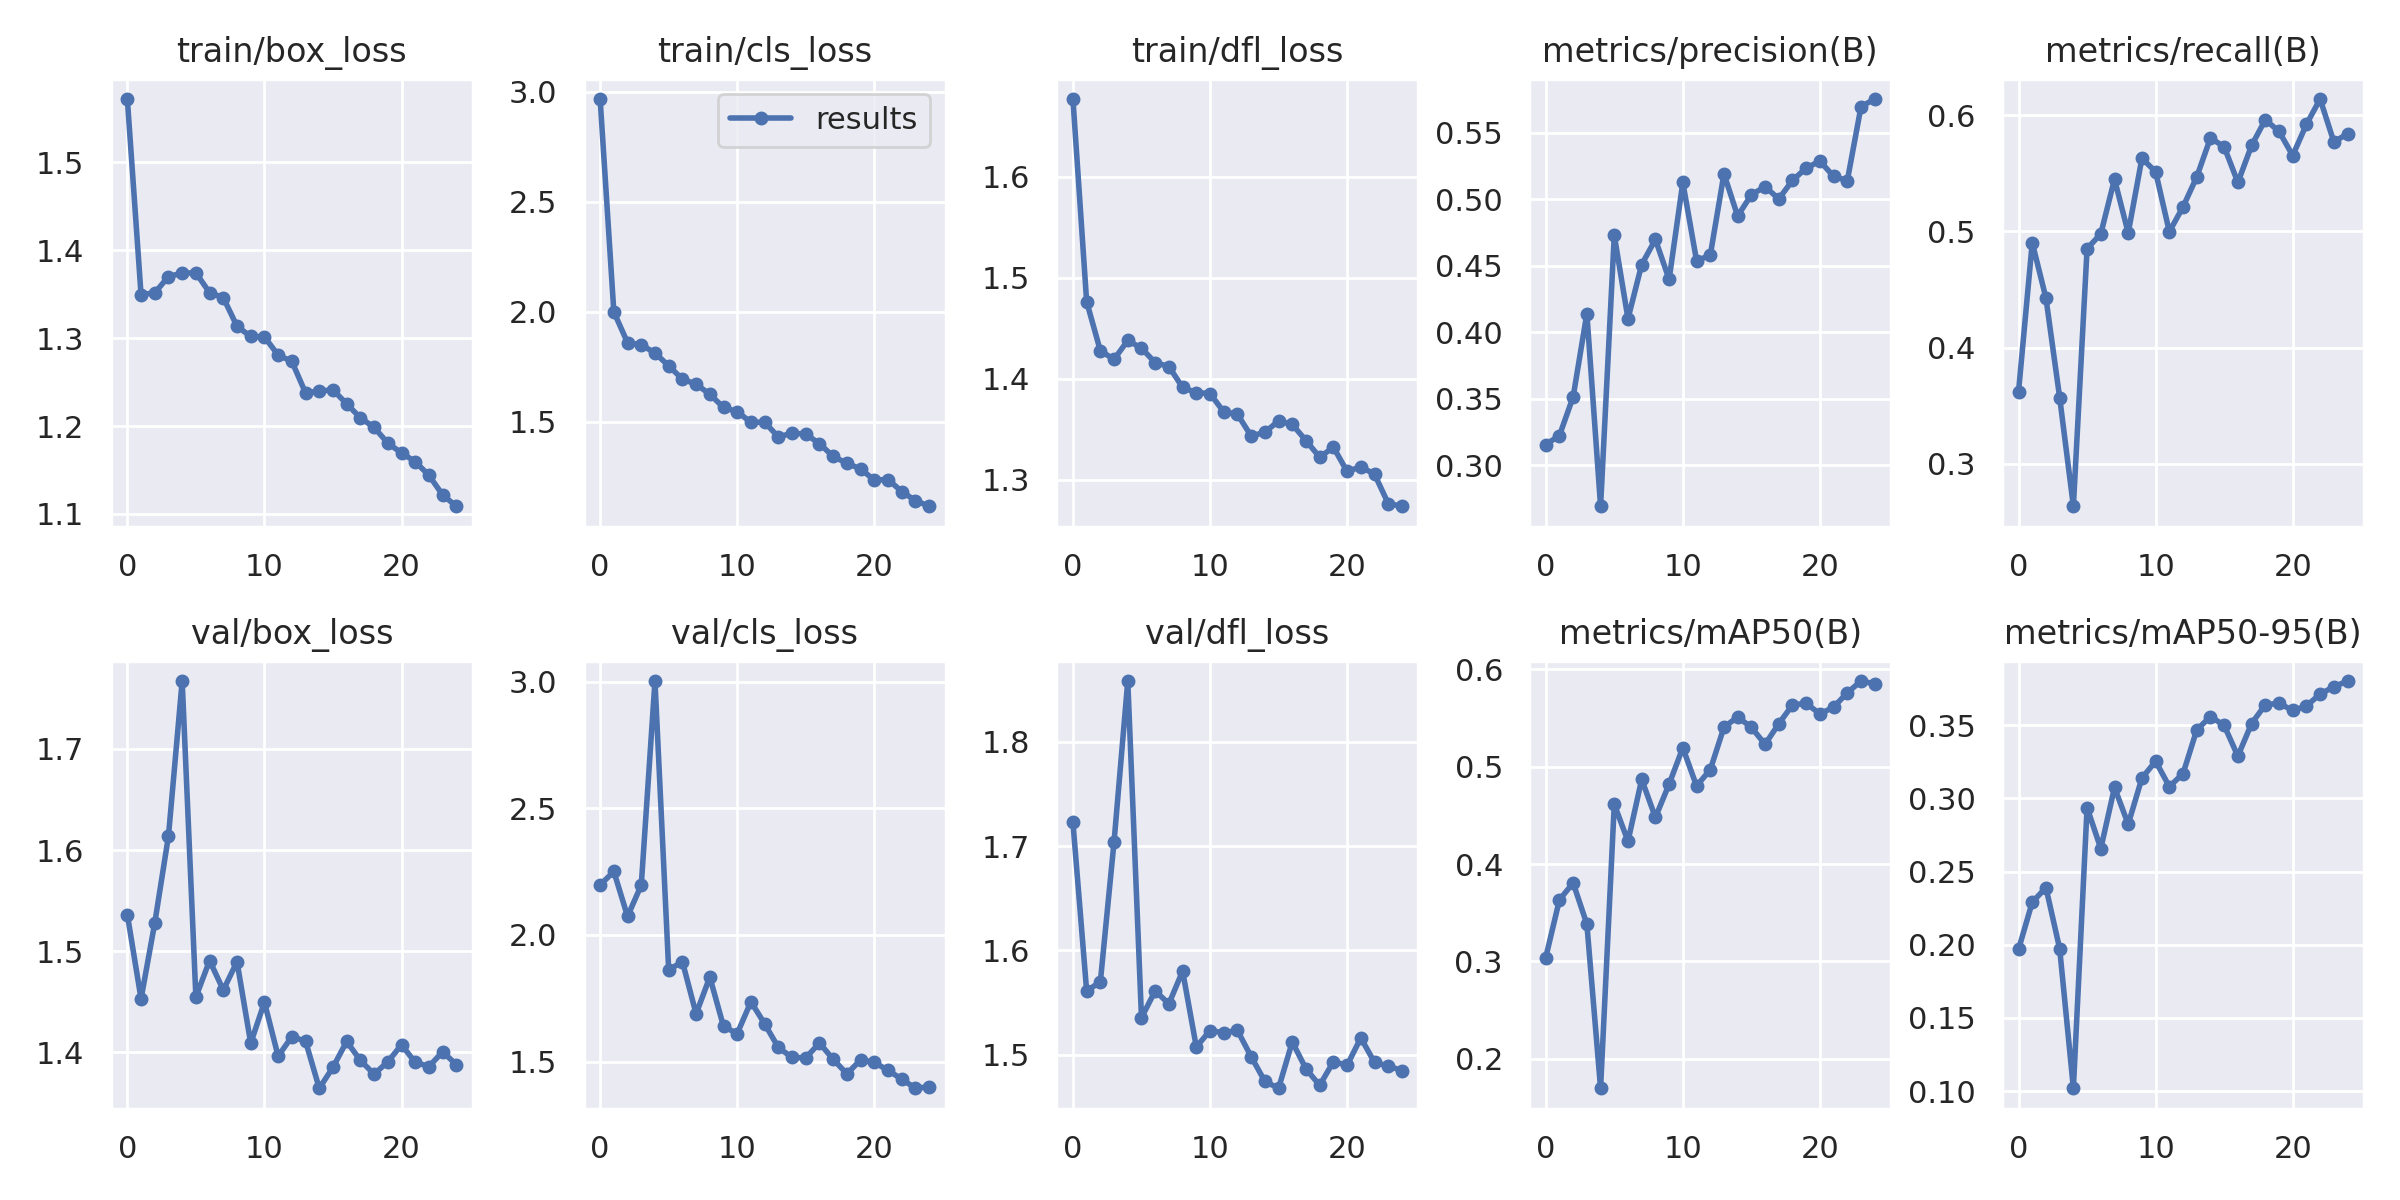

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/drive/MyDrive/YoloV8/runs/detect/train5/results.png', width=600)

/content


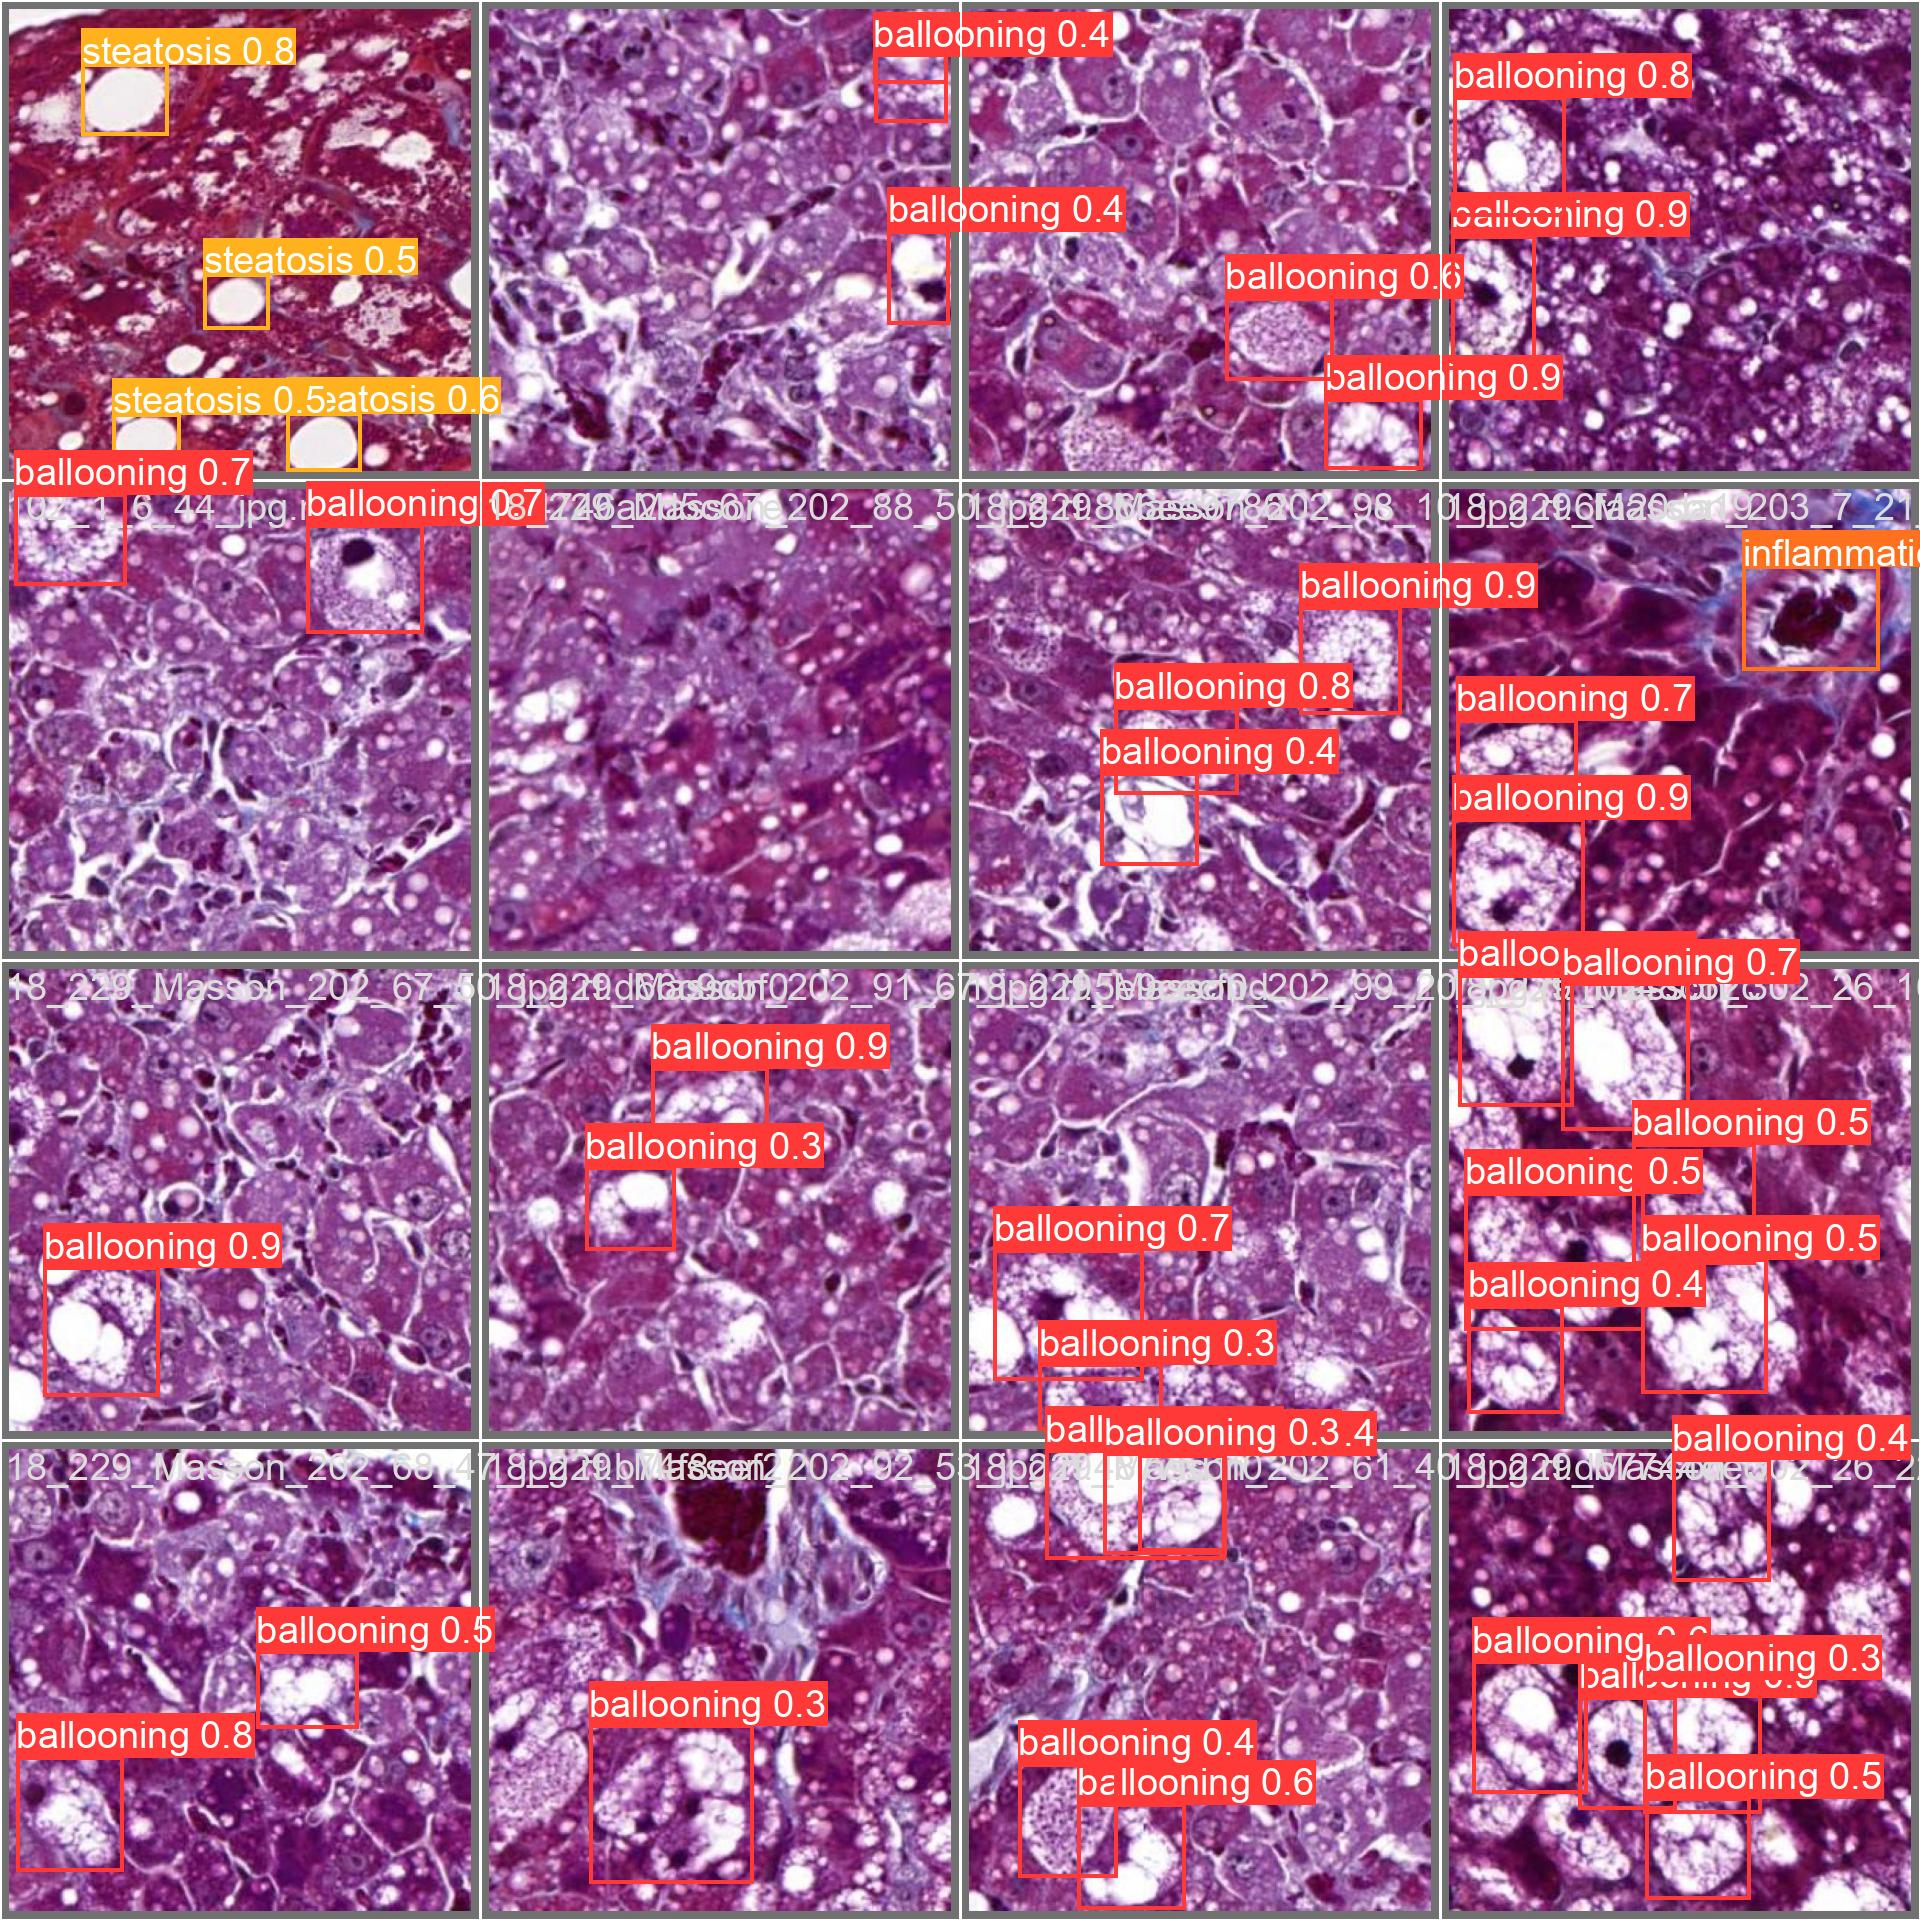

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/drive/MyDrive/YoloV8/runs/detect/train5/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}/drive/MyDrive/YoloV8

!yolo task=detect mode=val model={HOME}/drive/MyDrive/YoloV8/runs/detect/train5/weights/best.pt data={dataset.location}/data.yaml

/content/drive/MyDrive/YoloV8
2023-10-27 08:12:30.582508: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-27 08:12:30.582570: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-27 08:12:30.582611: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-27 08:12:30.594140: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-27 08:12:32.

## Inference with Custom Model

In [ ]:
%cd {HOME}/drive/MyDrive/YoloV8
!yolo task=detect mode=predict model={HOME}/drive/MyDrive/YoloV8/runs/detect/train5/weights/best.pt conf=0.25 source={HOME}/drive/MyDrive/YoloV8/datasets/Liver-Disease-1/test/images save=True

/content/drive/MyDrive/YoloV8
2023-10-27 08:33:10.977545: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-27 08:33:10.977612: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-27 08:33:10.977680: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-27 08:33:10.986624: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-27 08:33:12.

**NOTE:** Let's take a look at few results.

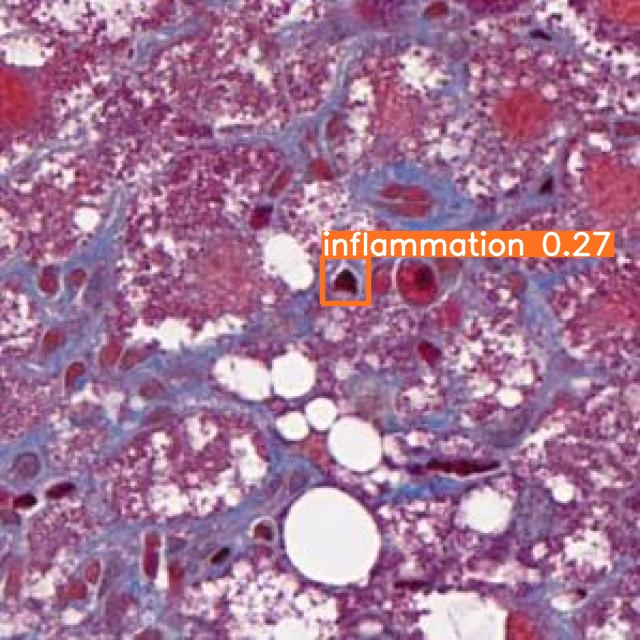

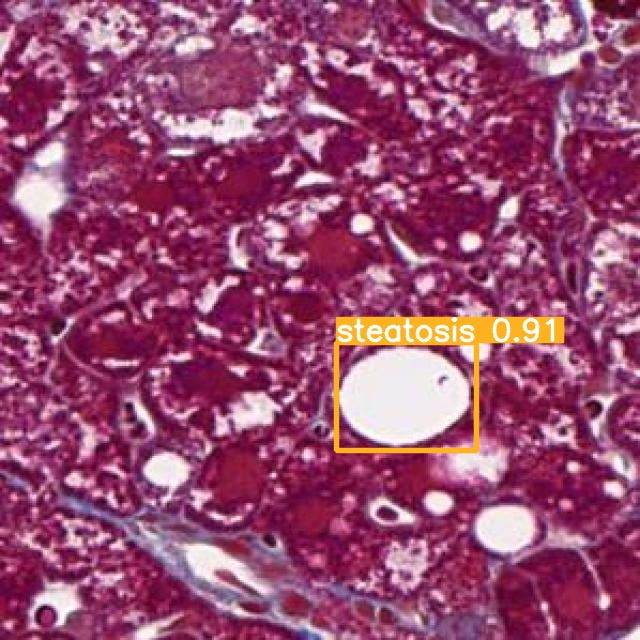

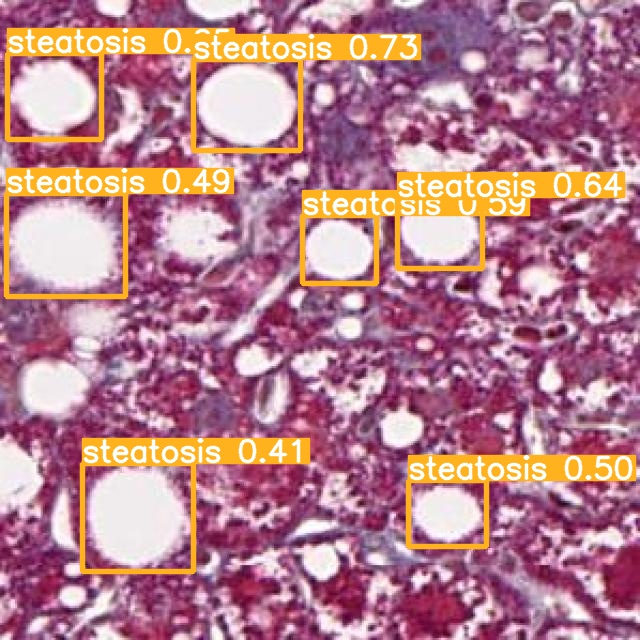

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/drive/MyDrive/YoloV8/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")